# TASK#3
To Explore Unsupervised Machine Learning.
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [5]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.shape

(150, 4)

# DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025435DE6C48>,
      dtype=object)

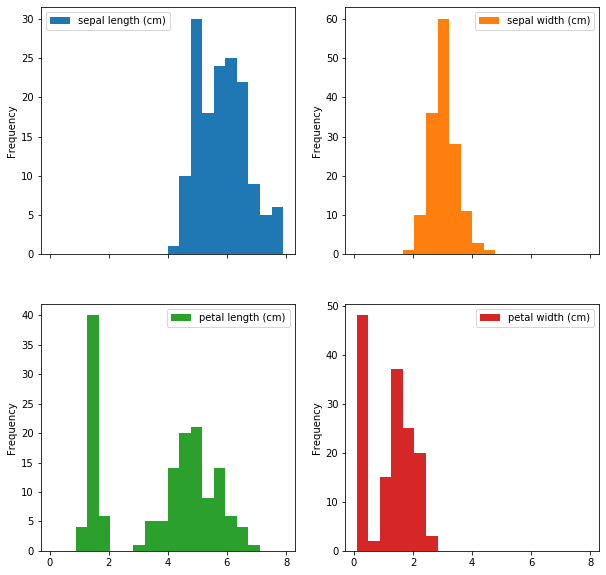

In [7]:
iris_df.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)


In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(iris_df)
pred=kmeans.predict(iris_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
pd.Series(pred).value_counts()

0    97
1    53
dtype: int64

In [10]:
kmeans.inertia_

152.34795176035792

In [11]:
kmeans.score(iris_df)

-152.34795176035684

Finding the optimal number of clusters.

In [12]:
SSE=[]
for cluster in range(1,20):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(iris_df)
    SSE.append(kmeans.inertia_)
frame=pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})

Plotting the Elbow Curve.

Text(0, 0.5, 'Inertia')

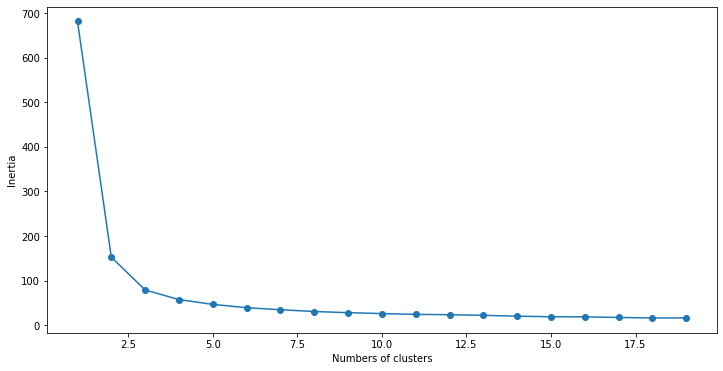

In [13]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Numbers of clusters')
plt.ylabel('Inertia')

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = iris_df.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# CLUSTER VISUALIZATION

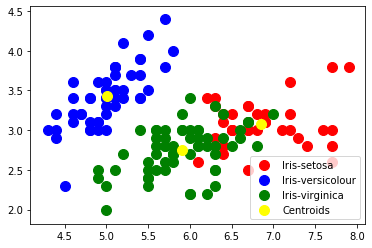

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()